#decision tree

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Ai Quest/class-09/Smoking data.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


#data visualization


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1338 non-null   object 
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [6]:
import seaborn as sns

target holo smoker

In [7]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

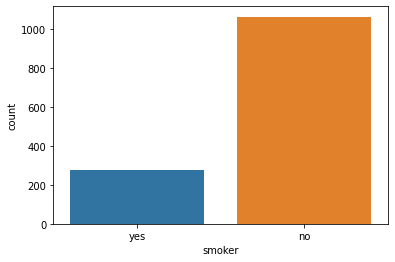

In [8]:
sns.countplot(x='smoker', data=df)

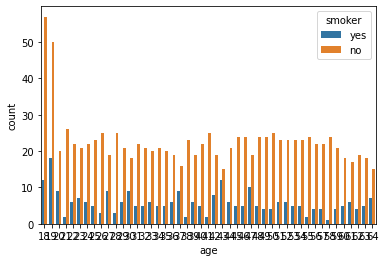

In [9]:
sns.countplot(x='age',data=df, hue='smoker')

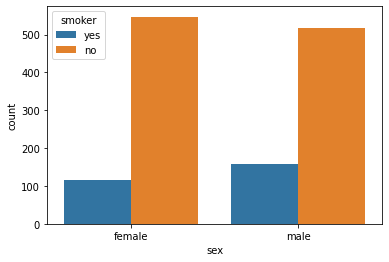

In [10]:
sns.countplot(x='sex',data=df, hue='smoker')

#x y partition

In [11]:
x = df.drop('smoker',axis=1)

In [12]:
y = df['smoker']

#encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
from pandas.core.dtypes.common import is_numeric_dtype

In [16]:
for column in x.columns:
    if is_numeric_dtype(x[column]):
        continue
    
    x[column] = le.fit_transform(x[column])

In [17]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


#spliting

In [18]:
from sklearn.model_selection import train_test_split as tts

In [19]:
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.70,random_state=1) 

In [20]:
xtrain.head()

,region,age,sex,bmi,children
744,1,50,1,26.41,0
363,3,21,0,26.40,1
10,0,25,1,26.22,0
970,2,50,0,28.16,3
634,3,51,1,39.70,1


In [21]:
ytrain.head()

744    no
363    no
10     no
970    no
634    no
Name: smoker, dtype: object

In [22]:
from sklearn.tree import DecisionTreeClassifier
d_clf = DecisionTreeClassifier()


#training

In [23]:
d_clf.fit(xtrain,ytrain) #fit manei training

DecisionTreeClassifier()

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

In [25]:
#tree.plot_tree(d_clf)

In [26]:
#plt.figure(figsize=(10,10))
#tree.plot_tree(d_clf)

#training tree

In [27]:
x_features = xtrain.columns

[Text(0.3416886086474501, 0.9791666666666666, 'sex <= 0.5\ngini = 0.327\nsamples = 936\nvalue = [743, 193]'),
 Text(0.21006703852549888, 0.9375, 'bmi <= 22.605\ngini = 0.294\nsamples = 457\nvalue = [375, 82]'),
 Text(0.057649667405764965, 0.8958333333333334, 'age <= 45.0\ngini = 0.449\nsamples = 47\nvalue = [31, 16]'),
 Text(0.05321507760532151, 0.8541666666666666, 'age <= 38.5\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(0.031042128603104215, 0.8125, 'bmi <= 21.47\ngini = 0.451\nsamples = 35\nvalue = [23, 12]'),
 Text(0.013303769401330377, 0.7708333333333334, 'children <= 1.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.008869179600886918, 0.7291666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.017738359201773836, 0.7291666666666666, 'age <= 28.0\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.008869179600886918, 0.6875, 'bmi <= 20.663\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.004434589800443459, 0.6458333333333334, 'gini = 0.0\n

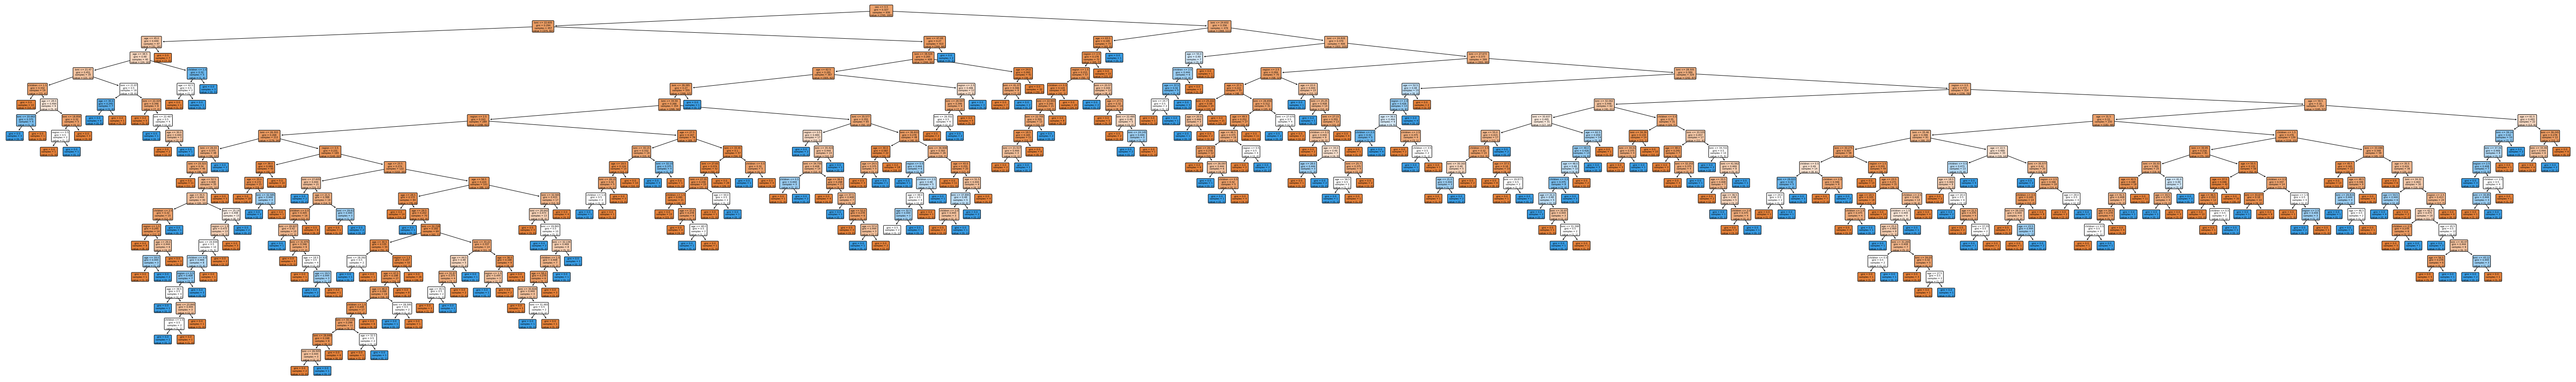

In [28]:
plt.figure(figsize=(100,15))
tree.plot_tree(d_clf,filled=True,rounded=True,feature_names=x_features)

#testing

In [29]:
testing = d_clf.predict(xtest) # ytest

In [30]:
ytest.head

<bound method NDFrame.head of 559      no
1087     no
1020     no
460      no
802      no
       ... 
323      no
1268     no
134      no
1274    yes
876      no
Name: smoker, Length: 402, dtype: object>

In [31]:
testing

array(['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no'

#testing tree

[Text(0.3416886086474501, 0.9791666666666666, 'sex <= 0.5\ngini = 0.327\nsamples = 936\nvalue = [743, 193]'),
 Text(0.21006703852549888, 0.9375, 'bmi <= 22.605\ngini = 0.294\nsamples = 457\nvalue = [375, 82]'),
 Text(0.057649667405764965, 0.8958333333333334, 'age <= 45.0\ngini = 0.449\nsamples = 47\nvalue = [31, 16]'),
 Text(0.05321507760532151, 0.8541666666666666, 'age <= 38.5\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(0.031042128603104215, 0.8125, 'bmi <= 21.47\ngini = 0.451\nsamples = 35\nvalue = [23, 12]'),
 Text(0.013303769401330377, 0.7708333333333334, 'children <= 1.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.008869179600886918, 0.7291666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.017738359201773836, 0.7291666666666666, 'age <= 28.0\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.008869179600886918, 0.6875, 'bmi <= 20.663\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.004434589800443459, 0.6458333333333334, 'gini = 0.0\n

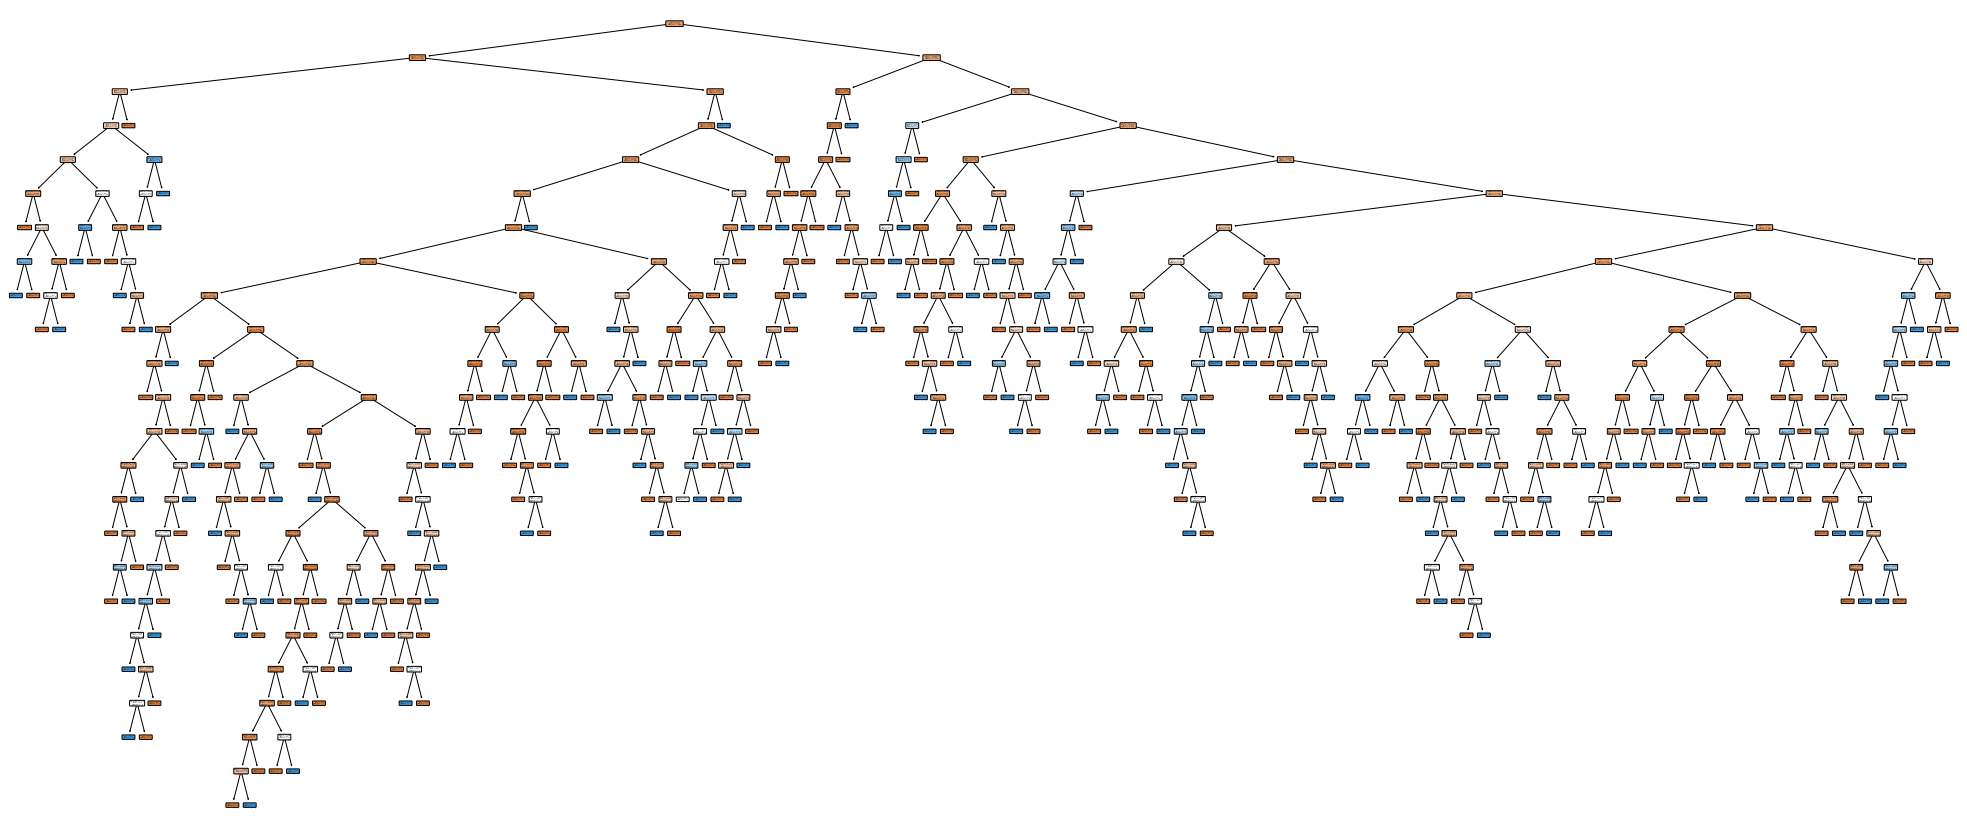

In [32]:
xtst_features = xtest.columns
plt.figure(figsize=(35,15))
tree.plot_tree(d_clf,filled=True,rounded=True,feature_names=xtst_features)

southwest,	19,	female,	27.900,	0  ------------- 	yes


southeast,	18,	male,	33.770,	1	 ------------ no

uporer ta nominal

nicher ta corresponding numeric with label encoder


3	19	0	27.900	0	------------ yes


2	18	1	33.770	1	----------- no

In [33]:
ytrain.value_counts()

no     743
yes    193
Name: smoker, dtype: int64

In [34]:
ytest.value_counts()

no     321
yes     81
Name: smoker, dtype: int64

#predict

In [35]:
d_clf.predict([[3, 19, 0, 27.900, 0]])  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['yes'], dtype=object)

In [36]:
d_clf.predict([[2, 18, 1, 33.770, 1 ]])  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['no'], dtype=object)

In [37]:
pred = d_clf.predict(xtest) # predicted result

In [38]:
pred

array(['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no'

In [39]:
import numpy as np
np.array(ytest) #actual result

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',

#prediction measurements 

In [40]:
d_clf.score(xtest, ytest)

0.681592039800995

In [41]:
d_clf.score(xtrain, ytrain)

0.9989316239316239

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [43]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

          no       0.80      0.81      0.80       321
         yes       0.19      0.19      0.19        81

    accuracy                           0.68       402
   macro avg       0.50      0.50      0.50       402
weighted avg       0.68      0.68      0.68       402



In [44]:
con_mat = confusion_matrix(ytest, pred)

In [45]:
con_mat

array([[259,  62],
       [ 66,  15]])

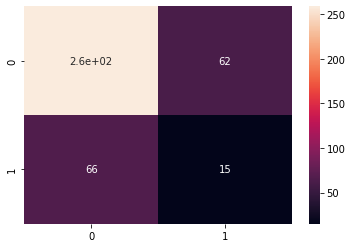

In [46]:
sns.heatmap(con_mat, annot=True)

In [47]:
TP, FN, FP, TN = confusion_matrix(ytest, pred).reshape(-1)

In [48]:
TP

259

In [49]:
FP

66

In [50]:
TN

15

In [51]:
FN

62

#accuracy

In [52]:
accuracy = (TP+TN)/ (TP+FP+TN+FN)

In [53]:
accuracy

0.681592039800995

#ROC_CURVE

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


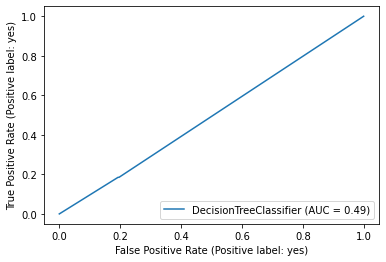

In [54]:
plot_roc_curve(d_clf, xtest, ytest)

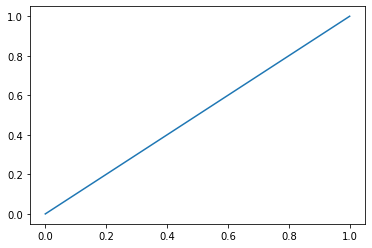

In [55]:
plt.plot([0,1],[0,1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


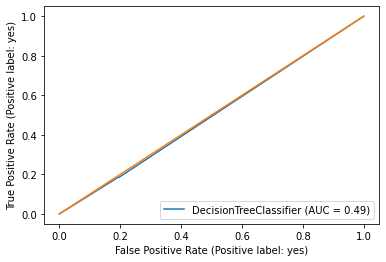

In [56]:
plot_roc_curve(d_clf,xtest,ytest)
plt.plot([0,1],[0,1])

AUC = 0.51 that means not acceptable  

#Precision or positive predictive value (PPV)

In [57]:
Precision = TP/(TP+FP)

In [58]:
Precision

0.796923076923077

#Sensitivity or Recall or HIt Rate or True Positive Rate (TPR)

In [59]:
Recall = TP/(TP+FN)

In [60]:
Recall

0.8068535825545171

#False Positive Rate

In [61]:
FPR = FP/(FP+TN)

In [62]:
FPR

0.8148148148148148

#F1 Measure

In [63]:
F1_Measure =  (Precision+Recall)/2

In [64]:
F1_Measure

0.8018883297387971

#Harmonic Mean or F1 score

In [65]:
F1_score = (2*Precision*Recall)/(Precision+Recall)

In [66]:
F1_score

0.8018575851393189

#Specificity

In [67]:
Specificity = TN/(TN+FP)

In [68]:
Specificity

0.18518518518518517

#Critical Success Index (CSI)

In [69]:
CSI = TP/(TP+FN+FP)

In [70]:
CSI

0.6692506459948321

#False Discovery Rate(FDR)

In [71]:
FDR = FP/(TP+FP)

In [72]:
FDR

0.20307692307692307

another time score measuring 


In [73]:
d_clf.score(xtest, ytest)

0.681592039800995

#Random Forest Classifier

with default parameter

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
clf_r = RandomForestClassifier() 

In [76]:
clf_r.fit(xtrain,ytrain)

RandomForestClassifier()

In [77]:
clf_r.score(xtest,ytest)

0.763681592039801

without random forest score 0.6666666666666666

with random forest score 0.7587064676616916

#Hyper Parameter Tuning

ekhn parameter gulo select kore nei

In [78]:
clf_r2 = RandomForestClassifier()

In [79]:
 number_of_trees = np.random.randint(25, 500,25)

In [80]:
number_of_trees

array([ 45, 220, 173, 223, 204, 379, 326, 294,  53, 341, 354, 356,  25,
       493,  76, 377, 394, 324, 195, 432, 420,  98, 135, 490, 104])

In [81]:
criterion = ['gini', 'entropy']
max_depth = np.random.randint(1,8,30)
min_samples_split = [2,3,4]
max_features = ['auto', 'sqrt', 'log2']

In [82]:
parameters = {
    'n_estimators' : number_of_trees,
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'max_features' : max_features


}

In [83]:
print(parameters)

{'n_estimators': array([ 45, 220, 173, 223, 204, 379, 326, 294,  53, 341, 354, 356,  25,
       493,  76, 377, 394, 324, 195, 432, 420,  98, 135, 490, 104]), 'criterion': ['gini', 'entropy'], 'max_depth': array([1, 7, 6, 1, 2, 1, 2, 5, 5, 3, 7, 3, 3, 4, 3, 1, 4, 5, 3, 2, 6, 3,
       4, 1, 4, 6, 5, 5, 5, 1]), 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}


#GridSearchCV

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
grid_cv = GridSearchCV(clf_r2, parameters, cv = 3, verbose = 4  )

In [ ]:
grid_cv.fit(xtrain, ytrain)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=3, n_estimators=53;, score=0.795 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=3, n_estimators=53;, score=0.792 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=3, n_estimators=341;, score=0.795 total time=   0.6s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=3, n_estimators=341;, score=0.795 total time=   0.6s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=3, n_estimators=341;, score=0.785 total time=   0.6s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=3, n_estimators=354;, score=0.795 total time=   0.6s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_split=3, n_estimators=354;, score=0.795 total time=   0.6s
[CV 3/

In [ ]:
grid_cv.cv_results_

In [91]:
cv_results_ = pd.DataFrame(grid_cv.cv_results_)

In [92]:
cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.068494,0.004573,0.007175,0.000022,gini,1,auto,2,45,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.794872,0.794872,0.791667,0.793803,0.001511,3
1,0.320415,0.038708,0.024755,0.000269,gini,1,auto,2,220,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.794872,0.794872,0.791667,0.793803,0.001511,3
2,0.238134,0.010429,0.020343,0.000759,gini,1,auto,2,173,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.794872,0.794872,0.791667,0.793803,0.001511,3
3,0.310409,0.025015,0.030065,0.003852,gini,1,auto,2,223,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.794872,0.794872,0.791667,0.793803,0.001511,3
4,0.285927,0.011735,0.023775,0.000447,gini,1,auto,2,204,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.794872,0.794872,0.791667,0.793803,0.001511,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,0.549187,0.001569,0.044474,0.000178,entropy,1,log2,4,420,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.794872,0.794872,0.791667,0.793803,0.001511,3
13496,0.133686,0.003965,0.012361,0.000021,entropy,1,log2,4,98,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.794872,0.794872,0.791667,0.793803,0.001511,3
13497,0.182836,0.006199,0.015852,0.000047,entropy,1,log2,4,135,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.794872,0.794872,0.791667,0.793803,0.001511,3
13498,0.638246,0.003079,0.052437,0.000367,entropy,1,log2,4,490,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.794872,0.794872,0.791667,0.793803,0.001511,3


In [93]:
grid_cv.best_score_

0.7948717948717948

In [97]:
grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 25}

In [99]:
clf4 = grid_cv.best_estimator_

In [100]:
clf4

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=25)

In [101]:
clf4.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=25)

In [103]:
clf4.score(xtest,ytest)

0.7985074626865671